The risk of having CHD ten years from now can be predicted from data available today on patients such as blood pressure, cholesterol level, smoking habits, age.Using a simple logistic regression model it is possible to do predictions, clinical prediction rules and new markets for drugs and prevention programmes.

In 1991, Framingham Heart Study (FHS) embarked on an ambitious and landmark project in health research. At that time, little was known about the causes of heart disease and stroke, and death rates for cardiovascular diseases were increasing. The objective of FHS was to identify the common factors on characteristics that contribute to CVD by following its developmentover a long period of time in a large group of patients who had not yet developed overt symptomsof CVD or suffered a heart attack/stroke.

Most of what is known today about the risks of having heart dieseases come from the FHS, albeit calibrated for local populations.

In [4]:
heart <- read.csv("csv/framingham.csv")
str(heart)

'data.frame':	11627 obs. of  39 variables:
 $ RANDID  : int  2448 2448 6238 6238 6238 9428 9428 10552 10552 11252 ...
 $ SEX     : int  1 1 2 2 2 1 1 2 2 2 ...
 $ TOTCHOL : int  195 209 250 260 237 245 283 225 232 285 ...
 $ AGE     : int  39 52 46 52 58 48 54 61 67 46 ...
 $ SYSBP   : num  106 121 121 105 108 ...
 $ DIABP   : num  70 66 81 69.5 66 80 89 95 109 84 ...
 $ CURSMOKE: int  0 0 0 0 0 1 1 1 1 1 ...
 $ CIGPDAY : int  0 0 0 0 0 20 30 30 20 23 ...
 $ BMI     : num  27 NA 28.7 29.4 28.5 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HEARTRTE: int  80 69 95 80 80 75 75 65 60 85 ...
 $ GLUCOSE : int  77 92 76 86 71 70 87 103 89 85 ...
 $ educ    : int  4 4 2 2 2 1 1 3 3 3 ...
 $ PREVCHD : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP : int  0 0 0 0 0 0 0 1 1 0 ...
 $ TIME    : int  0 4628 0 2156 4344 0 2199 0 1977 0 ...

Here, we will only look at the first period where people do not have CHD, so that we can observe how factors affect the prevalence of CHD in the long run.

In [7]:
heart1 <- subset(heart, PERIOD==1 & PREVCHD==0)
str(heart1)

heart1$TENCHD <- as.integer(heart1$TIMECHD/365<=10)

'data.frame':	4240 obs. of  39 variables:
 $ RANDID  : int  2448 6238 9428 10552 11252 11263 12629 12806 14367 16365 ...
 $ SEX     : int  1 2 1 2 2 2 2 2 1 1 ...
 $ TOTCHOL : int  195 250 245 225 285 228 205 313 260 225 ...
 $ AGE     : int  39 46 48 61 46 43 63 45 52 43 ...
 $ SYSBP   : num  106 121 128 150 130 ...
 $ DIABP   : num  70 81 80 95 84 110 71 71 89 107 ...
 $ CURSMOKE: int  0 0 1 1 1 0 0 1 0 1 ...
 $ CIGPDAY : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BMI     : num  27 28.7 25.3 28.6 23.1 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HEARTRTE: int  80 95 75 65 85 77 60 79 76 93 ...
 $ GLUCOSE : int  77 76 70 103 85 99 85 78 79 88 ...
 $ educ    : int  4 2 1 3 3 2 1 2 1 1 ...
 $ PREVCHD : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP : int  0 0 0 1 0 1 0 0 1 1 ...
 $ TIME    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PERIOD 

In [11]:
heart2 <- heart1[,c(1:21,40)] # we only want dataframe factors indexes 1 to 21, and factor 40 (TENCHD)
str(heart2)
c(1:21,40)

'data.frame':	4240 obs. of  22 variables:
 $ RANDID  : int  2448 6238 9428 10552 11252 11263 12629 12806 14367 16365 ...
 $ SEX     : int  1 2 1 2 2 2 2 2 1 1 ...
 $ TOTCHOL : int  195 250 245 225 285 228 205 313 260 225 ...
 $ AGE     : int  39 46 48 61 46 43 63 45 52 43 ...
 $ SYSBP   : num  106 121 128 150 130 ...
 $ DIABP   : num  70 81 80 95 84 110 71 71 89 107 ...
 $ CURSMOKE: int  0 0 1 1 1 0 0 1 0 1 ...
 $ CIGPDAY : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BMI     : num  27 28.7 25.3 28.6 23.1 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HEARTRTE: int  80 95 75 65 85 77 60 79 76 93 ...
 $ GLUCOSE : int  77 76 70 103 85 99 85 78 79 88 ...
 $ educ    : int  4 2 1 3 3 2 1 2 1 1 ...
 $ PREVCHD : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP : int  0 0 0 1 0 1 0 0 1 1 ...
 $ TIME    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PERIOD 

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 40

In [28]:
library("caTools") # import 'caTools' library
# ?sample.split

# uses sample.split to split data into 65:35 ratio by maintaining ratio of TENCHD variable in both sets
set.seed(1) # to ensure reproducible results
splitcrit <- sample.split(heart2$TENCHD, SplitRatio=0.65)
heart_train <- subset(heart2, splitcrit==T)
heart_test <- subset(heart2, splitcrit==F)

# create logistic regression model using all predictors
model1 <- glm(TENCHD~., data=heart_train, family="binomial")
summary(model1)


Call:
glm(formula = TENCHD ~ ., family = "binomial", data = heart_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2162  -0.6057  -0.4474  -0.3029   2.7904  

Coefficients: (5 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.874e+00  8.700e-01  -7.902 2.75e-15 ***
RANDID      -3.594e-09  2.061e-08  -0.174 0.861547    
SEX         -5.471e-01  1.331e-01  -4.111 3.94e-05 ***
TOTCHOL      1.887e-03  1.376e-03   1.371 0.170246    
AGE          5.475e-02  8.083e-03   6.773 1.26e-11 ***
SYSBP        1.231e-02  4.684e-03   2.628 0.008601 ** 
DIABP       -2.138e-03  7.979e-03  -0.268 0.788704    
CURSMOKE    -1.219e-01  1.943e-01  -0.628 0.530190    
CIGPDAY      2.168e-02  7.823e-03   2.771 0.005584 ** 
BMI          1.234e-02  1.526e-02   0.809 0.418782    
DIABETES    -1.934e-01  3.897e-01  -0.496 0.619678    
BPMEDS       7.219e-02  3.027e-01   0.238 0.811495    
HEARTRTE    -1.251e-03  5.104e-03  -0.245

In [44]:
# model without NA removal
model2 <- glm(TENCHD~
              SEX+TOTCHOL+AGE+SYSBP+DIABP+CURSMOKE+CIGPDAY+BMI+DIABETES+BPMEDS+HEARTRTE+GLUCOSE+educ+PREVSTRK+PREVHYP,
              data=heart_train,
              family="binomial")

# model with NA removal
model2b <- glm(TENCHD~
              SEX+TOTCHOL+AGE+SYSBP+DIABP+CURSMOKE+CIGPDAY+BMI+DIABETES+BPMEDS+HEARTRTE+GLUCOSE+educ+PREVSTRK+PREVHYP,
              data=na.omit(heart_train),
              family="binomial")

summary(model2)
summary(model2b)


Call:
glm(formula = TENCHD ~ SEX + TOTCHOL + AGE + SYSBP + DIABP + 
    CURSMOKE + CIGPDAY + BMI + DIABETES + BPMEDS + HEARTRTE + 
    GLUCOSE + educ + PREVSTRK + PREVHYP, family = "binomial", 
    data = heart_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2221  -0.6061  -0.4469  -0.3030   2.7865  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.893440   0.863061  -7.987 1.38e-15 ***
SEX         -0.546744   0.133067  -4.109 3.98e-05 ***
TOTCHOL      0.001892   0.001376   1.375 0.168999    
AGE          0.054723   0.008082   6.771 1.28e-11 ***
SYSBP        0.012335   0.004682   2.635 0.008415 ** 
DIABP       -0.002156   0.007979  -0.270 0.787031    
CURSMOKE    -0.121615   0.194276  -0.626 0.531322    
CIGPDAY      0.021662   0.007823   2.769 0.005625 ** 
BMI          0.012397   0.015259   0.812 0.416545    
DIABETES    -0.195542   0.389503  -0.502 0.615646    
BPMEDS       0.070097   0.302526   0.232 0.816767    
HEAR


Call:
glm(formula = TENCHD ~ SEX + TOTCHOL + AGE + SYSBP + DIABP + 
    CURSMOKE + CIGPDAY + BMI + DIABETES + BPMEDS + HEARTRTE + 
    GLUCOSE + educ + PREVSTRK + PREVHYP, family = "binomial", 
    data = na.omit(heart_train))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2221  -0.6061  -0.4469  -0.3030   2.7865  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.893440   0.863061  -7.987 1.38e-15 ***
SEX         -0.546744   0.133067  -4.109 3.98e-05 ***
TOTCHOL      0.001892   0.001376   1.375 0.168999    
AGE          0.054723   0.008082   6.771 1.28e-11 ***
SYSBP        0.012335   0.004682   2.635 0.008415 ** 
DIABP       -0.002156   0.007979  -0.270 0.787031    
CURSMOKE    -0.121615   0.194276  -0.626 0.531322    
CIGPDAY      0.021662   0.007823   2.769 0.005625 ** 
BMI          0.012397   0.015259   0.812 0.416545    
DIABETES    -0.195542   0.389503  -0.502 0.615646    
BPMEDS       0.070097   0.302526   0.232 0.816767

In [47]:
model3 <- glm(TENCHD~SEX+AGE+SYSBP+CIGPDAY+GLUCOSE, data=heart_train, family="binomial")
model3b <- glm(TENCHD~SEX+AGE+SYSBP+CIGPDAY+GLUCOSE, data=na.omit(heart_train), family="binomial")
summary(model3)
summary(model3b)

# stepwise regression to find optimal model
# step(model2)


Call:
glm(formula = TENCHD ~ SEX + AGE + SYSBP + CIGPDAY + GLUCOSE, 
    family = "binomial", data = heart_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3252  -0.5973  -0.4480  -0.3089   2.7699  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.160110   0.524258 -13.658  < 2e-16 ***
SEX         -0.540547   0.126240  -4.282 1.85e-05 ***
AGE          0.059845   0.007537   7.940 2.02e-15 ***
SYSBP        0.016072   0.002573   6.247 4.18e-10 ***
CIGPDAY      0.018223   0.005058   3.602 0.000315 ***
GLUCOSE      0.009935   0.002303   4.314 1.61e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2143.5  on 2496  degrees of freedom
Residual deviance: 1929.3  on 2491  degrees of freedom
  (259 observations deleted due to missingness)
AIC: 1941.3

Number of Fisher Scoring iterations: 5



Call:
glm(formula = TENCHD ~ SEX + AGE + SYSBP + CIGPDAY + GLUCOSE, 
    family = "binomial", data = na.omit(heart_train))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2864  -0.5945  -0.4525  -0.3125   2.7595  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.054993   0.535175 -13.183  < 2e-16 ***
SEX         -0.535382   0.129163  -4.145 3.40e-05 ***
AGE          0.057835   0.007716   7.496 6.59e-14 ***
SYSBP        0.016245   0.002629   6.179 6.46e-10 ***
CIGPDAY      0.017635   0.005186   3.400 0.000673 ***
GLUCOSE      0.009642   0.002358   4.090 4.32e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2037.5  on 2383  degrees of freedom
Residual deviance: 1840.8  on 2378  degrees of freedom
AIC: 1852.8

Number of Fisher Scoring iterations: 5


In [49]:
pred <- predict(model3, heart_test, type="response")

# predicted percentage chance of having heart disease
table(pred>0.5, heart_test$TENCHD)

       
           0    1
  FALSE 1113  187
  TRUE     9   21

In [51]:
# actual percentage chance of not having heart disease
table(heart_test$TENCHD)
1259/(1259+225)


   0    1 
1259  225 

[1] 0.8483827

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.7574258


Slot "alpha.values":
list()


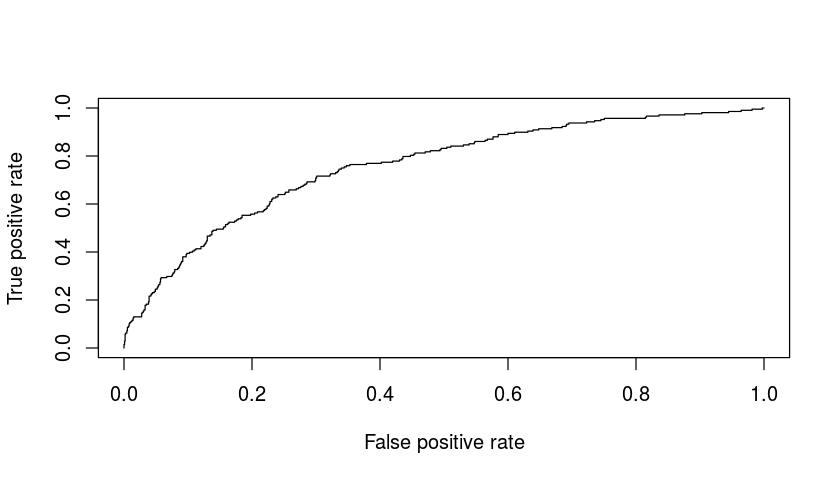

In [59]:
options(repr.plot.width=7, repr.plot.height=4) # resize IRkernel plot size

library(ROCR)
pred2 <- prediction(pred, heart_test$TENCHD)
perf2 <- performance(pred2, measure="tpr", x.measure="fpr")
plot(perf2)
performance(pred2, measure="auc")